In [18]:
import time 
import selfies
import rdkit
import random
import numpy as np
import random
from rdkit import Chem
from selfies import encoder, decoder
from rdkit.Chem import MolFromSmiles as smi2mol
from rdkit.Chem import AllChem
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from rdkit.Chem import Mol
from rdkit.Chem.AtomPairs.Sheridan import GetBPFingerprint, GetBTFingerprint
from rdkit.Chem.Pharm2D import Generate, Gobbi_Pharm2D
from rdkit.Chem import Draw
from rdkit.Chem.Descriptors import NumRadicalElectrons

from rdkit.Chem import MolToSmiles as mol2smi
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

import Stoned

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle

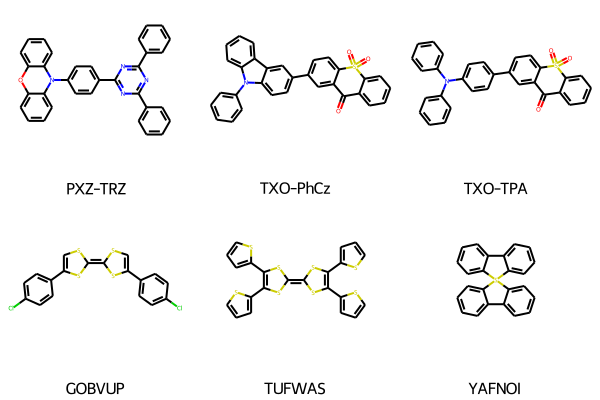

In [20]:
smi_dict = pickle.load(open("Mol_list_to_mutate.pkl",'rb'))
parent_mol_names = [key for key in smi_dict.keys()]
#smi -> mol
mols = [Chem.MolFromSmiles(smi) for smi in smi_dict.values()]
legends = [name for name in smi_dict.keys()]
img=Draw.MolsToGridImage(mols,molsPerRow=3,legends=legends)
img

In [21]:
the_data = pickle.load(open("the_data_NEW_3.pkl",'rb'))
parent_data = pickle.load(open("parent_data.pkl",'rb'))
# df_og_data = pd.merge(pickle.load(open("df_og_data.pkl",'rb')),pickle.load(open("df_og_DFT_data.pkl",'rb')))
# df_og_data

In [22]:
parent_csv_df = pd.read_csv('Parent_mol_DSCF_on_DFTGeopt.csv')
parent_csv_df

Mol_names           S0        S1        T1      HOMO      LUMO  LUMO-HOMO  \
0   PXZ-TRZ -7850.862883  2.316165  2.274697 -4.390653 -3.004151   1.386502   
1  TXO-PhCz -7756.894075  2.432550  2.356918 -5.222548 -3.520371   1.702177   
2   TXO-TPA -7788.606662  2.264893  2.201622 -4.812529 -3.606739   1.205789   
3    GOBVUP -5835.191395  1.664485  1.616883 -3.962517 -2.296047   1.666470   
4    TUFWAS -6349.704885  1.506892  1.459664 -3.889659 -2.408294   1.481365   

       DEST  N atoms     EV/atom    Forces  
0  0.041467       60 -130.847715  0.001166  
1  0.075632       55 -141.034438  0.001034  
2  0.063271       57 -136.642222  0.001150  
3  0.047602       34 -171.623276  0.007657  
4  0.047228       42 -151.183450  0.010894

### commented code below is DFT optimised parent geomety data

In [23]:
# df_parent_data = pd.merge(pickle.load(open("df_og_data.pkl",'rb')),parent_csv_df)
# df_parent_data

In [24]:
df_parent_data = pd.merge(pickle.load(open("df_og_data.pkl",'rb')),pickle.load(open("df_og_DFT_data.pkl",'rb')))
df_parent_data

Family                                             SMILES Mol_names  \
0   PXZ-TRZ  c7ccc(c6nc(c1ccccc1)nc(c5ccc(n4c2ccccc2oc3cccc...   PXZ-TRZ   
1  TXO-PhCz  O=C6c1ccccc1S(=O)(=O)c7ccc(c2ccc4c(c2)c3ccccc3...  TXO-PhCz   
2   TXO-TPA  O=C5c1ccccc1S(=O)(=O)c6ccc(c4ccc(N(c2ccccc2)c3...   TXO-TPA   
3    GOBVUP        Clc4ccc(c3csc(=c2scc(c1ccc(Cl)cc1)s2)s3)cc4    GOBVUP   
4    TUFWAS  c6csc(c4sc(=c3sc(c1cccs1)c(c2cccs2)s3)sc4c5ccc...    TUFWAS   
5    YAFNOI            c1ccc3c(c1)c2ccccc2S36c4ccccc4c5ccccc56    YAFNOI   

   fp_scores  SYBA_score  natoms   LambdaT  N_atoms  \
0          1   36.220805      38  0.107584       60   
1          1   27.806475      36  0.148074       55   
2          1   49.425950      36  0.124097       57   
3          1   -2.196499      24  0.551026       34   
4          1   18.543954      30  0.557252       42   
5          1   18.541930      25  0.843576       41   

                                      log file      HOMO      LUMO  LUMO-HOMO  \
0   log-PXZ-TRZ_PBE_MMFF94_s0xyz_s0_cubic.yaml -4.317159 -3.070328   1.246831   
1  log-TXO-PhCz_PBE_MMFF94_s0xyz_s0_cubic.yaml -5.218214 -3.504901   1.713312   
2   log-TXO-TPA_PBE_MMFF94_s0xyz_s0_cubic.yaml -4.844501 -3.538314   1.306187   
3    log-GOBVUP_PBE_MMFF94_s0xyz_s0_cubic.yaml -3.955886 -2.220191   1.735695   
4    log-TUFWAS_PBE_MMFF94_s0xyz_s0_cubic.yaml -3.866078 -2.294039   1.572039   
5    log-YAFNOI_PBE_MMFF94_s0xyz_s0_cubic.yaml -2.800095 -2.726797   0.073298   

      Force  Total Energy per atom (eV/atom)  
0  0.059228                      -130.845350  
1  0.078844                      -143.889830  
2  0.052497                      -139.398779  
3  0.041024                      -190.182191  
4  0.067476                      -181.225573  
5  0.186780                      -121.536756

In [25]:
df_SP_DFT_calculations = pickle.load(open("df_SP_DFT_calculations.pkl",'rb'))
df_SP_DFT_calculations

Mol_names                                    log file      HOMO  \
0     TXO-PhCz_2770  log-TXO-PhCz_2770_PBE_MMFF94_S0_cubic.yaml -5.206255   
1     TXO-PhCz_1650  log-TXO-PhCz_1650_PBE_MMFF94_S0_cubic.yaml -5.238605   
2      TXO-TPA_1486   log-TXO-TPA_1486_PBE_MMFF94_S0_cubic.yaml -5.944606   
3       GOBVUP_1858    log-GOBVUP_1858_PBE_MMFF94_S0_cubic.yaml -3.970825   
4       TUFWAS_1060    log-TUFWAS_1060_PBE_MMFF94_S0_cubic.yaml -3.521615   
...             ...                                         ...       ...   
1392     GOBVUP_196     log-GOBVUP_196_PBE_MMFF94_S0_cubic.yaml -4.527896   
1393     GOBVUP_854     log-GOBVUP_854_PBE_MMFF94_S0_cubic.yaml -4.381539   
1394   TXO-TPA_2069   log-TXO-TPA_2069_PBE_MMFF94_S0_cubic.yaml -5.570298   
1395   TXO-TPA_1372   log-TXO-TPA_1372_PBE_MMFF94_S0_cubic.yaml -6.053373   
1396     GOBVUP_494     log-GOBVUP_494_PBE_MMFF94_S0_cubic.yaml -4.046904   

          LUMO  LUMO-HOMO     Force  Total Energy per atom (eV/atom)   shell  
0    -3.551402   1.654853  0.112448                      -145.985557  closed  
1    -4.817694   0.420911  0.165944                      -144.228871    open  
2    -3.484950   2.459656  0.065933                      -145.046496  closed  
3    -3.330399   0.640426  0.054005                      -179.416348  closed  
4    -2.350833   1.170781  0.171337                      -147.149397  closed  
...        ...        ...       ...                              ...     ...  
1392 -3.305856   1.222040  0.145270                      -179.191853    open  
1393 -3.359973   1.021566  0.149764                      -171.533305  closed  
1394 -5.545090   0.025209  0.227163                      -147.975439    open  
1395 -5.742214   0.311159  0.089158                      -165.704356    open  
1396 -3.369292   0.677613  0.088424                      -184.374455    open  

[1370 rows x 8 columns]

In [26]:
for mol in df_SP_DFT_calculations['Mol_names']:#.query("Family == 'YAFNOI'")#.query("N_atoms >= 15").query("shell_type == 'closed'").query('SYBA >= -20').query('FF_optimisation_msg == "0"')
    if 'Y' in mol:
        print(mol)

In [27]:
df_HL_ol = pickle.load(open("LambdaT_data_generated_mols_COMPLETE.pkl",'rb'))
# df_HL_ol

In [28]:
df_5 = pd.merge(df_HL_ol,df_SP_DFT_calculations)

In [29]:
df_5['Family'] = [mol.split('_')[0] for mol in df_5['Mol_names']]

In [30]:
df_5 = pd.merge(pd.DataFrame(the_data),df_5)

In [31]:
df_parent_data

Family                                             SMILES Mol_names  \
0   PXZ-TRZ  c7ccc(c6nc(c1ccccc1)nc(c5ccc(n4c2ccccc2oc3cccc...   PXZ-TRZ   
1  TXO-PhCz  O=C6c1ccccc1S(=O)(=O)c7ccc(c2ccc4c(c2)c3ccccc3...  TXO-PhCz   
2   TXO-TPA  O=C5c1ccccc1S(=O)(=O)c6ccc(c4ccc(N(c2ccccc2)c3...   TXO-TPA   
3    GOBVUP        Clc4ccc(c3csc(=c2scc(c1ccc(Cl)cc1)s2)s3)cc4    GOBVUP   
4    TUFWAS  c6csc(c4sc(=c3sc(c1cccs1)c(c2cccs2)s3)sc4c5ccc...    TUFWAS   
5    YAFNOI            c1ccc3c(c1)c2ccccc2S36c4ccccc4c5ccccc56    YAFNOI   

   fp_scores  SYBA_score  natoms   LambdaT  N_atoms  \
0          1   36.220805      38  0.107584       60   
1          1   27.806475      36  0.148074       55   
2          1   49.425950      36  0.124097       57   
3          1   -2.196499      24  0.551026       34   
4          1   18.543954      30  0.557252       42   
5          1   18.541930      25  0.843576       41   

                                      log file      HOMO      LUMO  LUMO-HOMO  \
0   log-PXZ-TRZ_PBE_MMFF94_s0xyz_s0_cubic.yaml -4.317159 -3.070328   1.246831   
1  log-TXO-PhCz_PBE_MMFF94_s0xyz_s0_cubic.yaml -5.218214 -3.504901   1.713312   
2   log-TXO-TPA_PBE_MMFF94_s0xyz_s0_cubic.yaml -4.844501 -3.538314   1.306187   
3    log-GOBVUP_PBE_MMFF94_s0xyz_s0_cubic.yaml -3.955886 -2.220191   1.735695   
4    log-TUFWAS_PBE_MMFF94_s0xyz_s0_cubic.yaml -3.866078 -2.294039   1.572039   
5    log-YAFNOI_PBE_MMFF94_s0xyz_s0_cubic.yaml -2.800095 -2.726797   0.073298   

      Force  Total Energy per atom (eV/atom)  
0  0.059228                      -130.845350  
1  0.078844                      -143.889830  
2  0.052497                      -139.398779  
3  0.041024                      -190.182191  
4  0.067476                      -181.225573  
5  0.186780                      -121.536756

In [32]:
df_5.query('Family == "TUFWAS"')#.query("N_atoms >= 30")

Family    Mol_names  fp_scores  \
1136  TUFWAS     TUFWAS_8   0.716981   
1137  TUFWAS    TUFWAS_16   0.651376   
1138  TUFWAS    TUFWAS_22   0.801980   
1139  TUFWAS    TUFWAS_31   0.104762   
1140  TUFWAS    TUFWAS_32   0.666667   
...      ...          ...        ...   
1353  TUFWAS  TUFWAS_2940   0.626168   
1354  TUFWAS  TUFWAS_2950   0.818182   
1355  TUFWAS  TUFWAS_2984   0.801980   
1356  TUFWAS  TUFWAS_3020   0.676190   
1357  TUFWAS  TUFWAS_3022   0.717172   

                                                 SMILES  N_atoms shell_type  \
1136  C=C1SC(C2=C(c3cccs3)SC(=C3SC(c4cccs4)=C(c4cccs...       31     closed   
1137  c1csc(C2=C(c3cccs3)SC(=C3SC(c4cccs4)[SH](c4ccc...       30     closed   
1138  Fc1csc(C2=C(c3cccs3)SC(=C3SC(c4cccs4)=C(c4cccs...       31     closed   
1139                                       O=CSCc1cccs1        9     closed   
1140  c1csc(C2=C(c3cccs3)SC([N+]3SC(c4cccs4)=C(c4ccc...       30       open   
...                                                 ...      ...        ...   
1353  C1=CC2=C(c3cccs3)SC(=C3SC(c4cccs4)=C(c4cccs4)S...       28     closed   
1354  c1csc(C2=C(c3cccs3)SC(=C3SC(c4cccs4)=C(c4cc[s+...       30     closed   
1355  [O-]c1csc(C2=C(c3cccs3)SC(=C3SC(c4cccs4)=C(c4c...       31     closed   
1356  [N-]=CC=CC1=C(c2cccs2)SC(=C2SC(c3cccs3)=C(c3cc...       29     closed   
1357  C#CC1=C(c2cccs2)SC(=C2SC(c3cccs3)=C(c3cccs3)S2)S1       27     closed   

           SYBA                                   FF_optimised_mol  \
1136  -6.382987  <rdkit.Chem.rdchem.Mol object at 0x00000213F91...   
1137  -1.374183  <rdkit.Chem.rdchem.Mol object at 0x00000213F91...   
1138   9.371151  <rdkit.Chem.rdchem.Mol object at 0x00000213F91...   
1139  17.104573  <rdkit.Chem.rdchem.Mol object at 0x00000213F91...   
1140  16.197348  <rdkit.Chem.rdchem.Mol object at 0x00000213F91...   
...         ...                                                ...   
1353  -7.234499  <rdkit.Chem.rdchem.Mol object at 0x00000213FA1...   
1354  18.543952  <rdkit.Chem.rdchem.Mol object at 0x00000213FA1...   
1355  18.731424  <rdkit.Chem.rdchem.Mol object at 0x00000213FA1...   
1356   0.910073  <rdkit.Chem.rdchem.Mol object at 0x00000213FA1...   
1357  12.614906  <rdkit.Chem.rdchem.Mol object at 0x00000213FA1...   

     FF_optimisation_msg  H_embed H_embed_msg   LambdaT  \
1136                   0      0.0        pass  0.812325   
1137                   0      0.0        pass  0.495954   
1138                   0      0.0        pass  0.554779   
1139                   0      0.0        pass  0.517632   
1140                   0      0.0        pass  0.432015   
...                  ...      ...         ...       ...   
1353                   0      0.0        pass  0.536787   
1354                   0      0.0        pass  0.650756   
1355                   0      0.0        pass  0.768741   
1356                   0      0.0        pass  0.776788   
1357                   0      0.0        pass  0.661468   

                                      log file      HOMO      LUMO  LUMO-HOMO  \
1136     log-TUFWAS_8_PBE_MMFF94_S0_cubic.yaml -4.237338 -4.124019   0.113319   
1137    log-TUFWAS_16_PBE_MMFF94_S0_cubic.yaml -2.963410 -2.424145   0.539266   
1138    log-TUFWAS_22_PBE_MMFF94_S0_cubic.yaml -3.937508 -2.403891   1.533617   
1139    log-TUFWAS_31_PBE_MMFF94_S0_cubic.yaml -5.857182 -2.183687   3.673495   
1140    log-TUFWAS_32_PBE_MMFF94_S0_cubic.yaml -3.944795 -2.349615   1.595180   
...                                        ...       ...       ...        ...   
1353  log-TUFWAS_2940_PBE_MMFF94_S0_cubic.yaml -2.633442 -2.569095   0.064348   
1354  log-TUFWAS_2950_PBE_MMFF94_S0_cubic.yaml -3.864179 -3.122130   0.742049   
1355  log-TUFWAS_2984_PBE_MMFF94_S0_cubic.yaml -4.538445 -4.388358   0.150087   
1356  log-TUFWAS_3020_PBE_MMFF94_S0_cubic.yaml -4.359379 -4.352587   0.006792   
1357  log-TUFWAS_3022_PBE_MMFF94_S0_cubic.yaml -3.963987 -2.374405   1.589582   

         Force  Total Energy per atom (eV/atom)   she

## NOTE there are 2 n atoms column

3


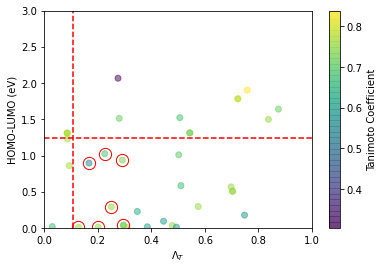

PXZ-TRZ Total: 37 filtered: 10 = 3 +7
9


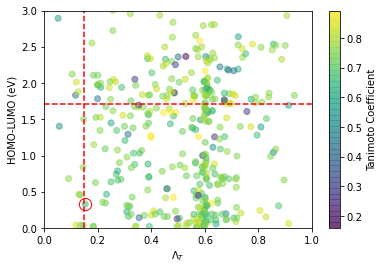

TXO-PhCz Total: 383 filtered: 10 = 9 +1
0


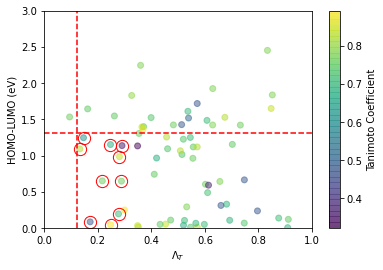

TXO-TPA Total: 72 filtered: 10 = 0 +10
50


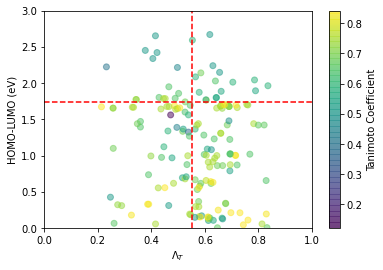

GOBVUP Total: 165 filtered: 60 = 50 +10
56


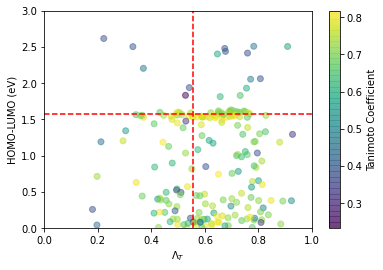

TUFWAS Total: 198 filtered: 66 = 56 +10
0


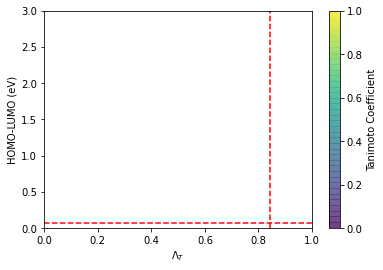

YAFNOI Total: 0 filtered: 0 = 0 +0


In [45]:
img_dpi = 300
for i,fam in enumerate(df_parent_data['Family']):
    thresh = df_parent_data['natoms'][i] - 10
    parent_lambdaT = df_parent_data['LambdaT'][i]
    parent_HL = df_parent_data['LUMO-HOMO'][i]  
    
    df= df_5.query('Family == @fam').query("N_atoms >= @thresh").query('fp_scores != 1')#.query("shell_type == 'closed'").query("shell == 'closed'")
    fig, ax = plt.subplots()
    scatter = ax.scatter(x='LambdaT', y='LUMO-HOMO', c='fp_scores', data=df, cmap='viridis', alpha=0.5)
    ax.set_xlabel('LambdaT')
    ax.set_ylabel('LUMO-HOMO')
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.ax.set_ylabel('Tanimoto Coefficient')
    plt.axvline(x=df_parent_data.query(f'Family == "{fam}"')['LambdaT'].values,color='r',label='Parent molecule',ls='--')
    plt.axhline(y=df_parent_data.query(f'Family == "{fam}"')['LUMO-HOMO'].values,color='r',label='Parent molecule',ls='--')
    
    n_mols = df.query("LambdaT <= @parent_lambdaT").query("LUMO-HOMO <= @parent_HL").shape[0]
    print(n_mols)
    if n_mols < 10:
        n_needed_mols = 10 - n_mols
        df_additional = df.query("LUMO-HOMO <= @parent_HL").query("LambdaT > @parent_lambdaT").sort_values('LambdaT').head(n_needed_mols)
        df_additional.plot.scatter(x='LambdaT',y='LUMO-HOMO',s=150,ax=ax, color = 'none',edgecolors='r')
        
    ax.set_ylabel('HOMO-LUMO (eV)')
    ax.set_xlabel('$\Lambda_T$')
    ax.set_xlim([0,1])
    ax.set_ylim([0,3])
    plt.savefig('Images/Scatter_HL_v_Lt'+fam+'_.png', bbox_inches='tight',dpi=img_dpi)
    plt.show()
    print(fam,'Total:',df.shape[0], 'filtered:',n_mols+df_additional.shape[0],'=',n_mols,'+'+str(df_additional.shape[0]))
#     break

# Box plot

In [35]:
import seaborn as sns

PXZ-TRZ
37
TXO-PhCz
383
TXO-TPA
72
GOBVUP
165
TUFWAS
198


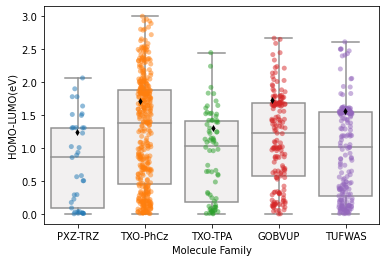

In [42]:
df_list = []
mols = []
parent_i = {}
parent_i['Location'] = []
parent_i['Letter'] = []
parent_i['value'] = []
converged_DSCF = {}

for i,family in enumerate(df_parent_data['Family']):
    if family != 'YAFNOI':
        print(family)
        thresh = df_parent_data['natoms'][i] - 10
        parent_HL = df_parent_data['LUMO-HOMO'][i] 
        parent_i['Location'].append(i)
        parent_i['Letter'].append("LUMO-HOMO")
        parent_i['value'].append(parent_HL)
        
        mols.append(family)
        df= df_5.query('Family == @family').query("N_atoms >= @thresh").query('fp_scores != 1')#.query("shell == 'closed'")
        print(df.shape[0])
        
        converged_DSCF[family] = [df.shape[0]]
        
        df_i = df[['LUMO-HOMO']].assign(Location=i)
        
        df_list.append(df_i)
    
cdf = pd.concat(df_list) 
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])        
ax = sns.boxplot(x="Location", y="value", hue="Letter", data=mdf, dodge=True,color = 'coral')
sns.stripplot(data=mdf,x="Location", y="value", ax=ax,alpha=0.5)

parent_df = pd.DataFrame(parent_i)
sns.stripplot(data=parent_df,x="Location", y="value", ax=ax,marker='d',color='black')

ax.set_xticklabels(mols)
ax.set(xlabel='Molecule Family', ylabel='HOMO-LUMO(eV)')
plt.legend([],[], frameon=False)
plt.savefig('Images/BoxPlot_HL_MMFF94.png', bbox_inches='tight',dpi=img_dpi)
plt.show()

In [43]:
pd.DataFrame(converged_DSCF)

PXZ-TRZ  TXO-PhCz  TXO-TPA  GOBVUP  TUFWAS
0       37       383       72     165     198

PXZ-TRZ
TXO-PhCz
TXO-TPA
GOBVUP
TUFWAS


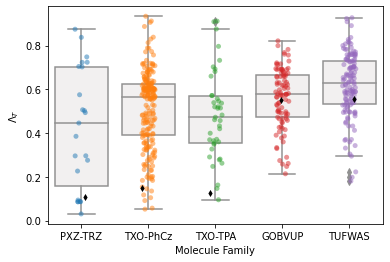

In [44]:
df_list = []
mols = []
parent_i = {}
parent_i['Location'] = []
parent_i['Letter'] = []
parent_i['value'] = []

for i,family in enumerate(df_parent_data['Family']):
    if family != 'YAFNOI':
        print(family)
        thresh = df_parent_data['natoms'][i] - 10
        parent_LT = df_parent_data['LambdaT'][i] 
        parent_i['Location'].append(i)
        parent_i['Letter'].append("LambdaT")
        parent_i['value'].append(parent_LT)
        
        mols.append(family)
        df= df_5.query('Family == @family').query("N_atoms >= @thresh").query("shell == 'closed'")
        df_i = df[['LambdaT']].assign(Location=i)
        
        df_list.append(df_i)
    
cdf = pd.concat(df_list) 
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])        
ax = sns.boxplot(x="Location", y="value", hue="Letter", data=mdf, dodge=True,color = 'coral')
sns.stripplot(data=mdf,x="Location", y="value", ax=ax,alpha=0.5)

parent_df = pd.DataFrame(parent_i)
sns.stripplot(data=parent_df,x="Location", y="value", ax=ax,marker='d',color='black')

ax.set_xticklabels(mols)
ax.set(xlabel='Molecule Family', ylabel='$\Lambda_T$')
plt.legend([],[], frameon=False)
plt.savefig('Images/BoxPlot_LT_MMFF94.png', bbox_inches='tight',dpi=img_dpi)
plt.show()

# Histograms

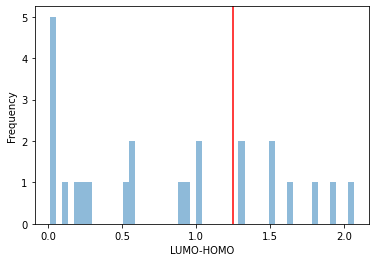

PXZ-TRZ


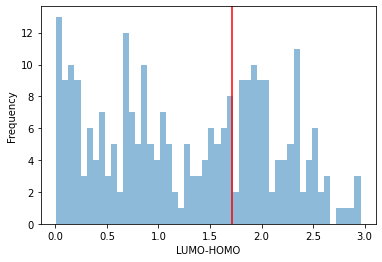

TXO-PhCz


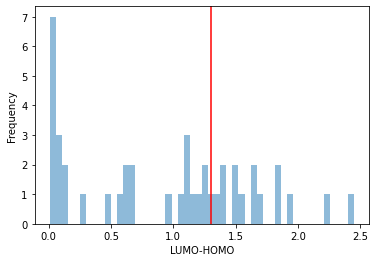

TXO-TPA


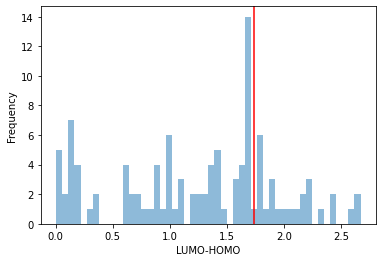

GOBVUP


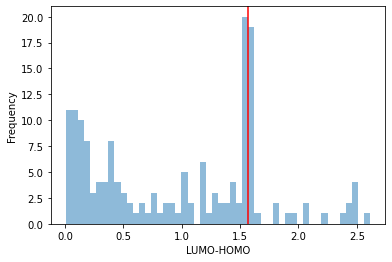

TUFWAS


In [46]:
# fig, axs = plt.subplots(2, len(smi_dict))
for i,family in enumerate(df_parent_data['Family']):
    if family != 'YAFNOI':
        #atom thresh
        thresh = df_parent_data['natoms'][i] - 10
        parent_LT = df_parent_data['LambdaT'][i] 

        df = df_5.query('Family == @family').query("N_atoms >= @thresh").query("shell_type == 'closed'")

#         bins = np.arange(0,4, 10)

        df['LUMO-HOMO'].plot.hist(alpha=0.5,bins=50)
        plt.axvline(x=df_parent_data['LUMO-HOMO'][i],color='r',label='Parent Molecule')
    #     plt.axvline(x=-20,label='SYBA -20',color='r',ls='--')
        plt.xlabel('LUMO-HOMO')
    #     plt.title(family)
    #     plt.legend()
    #     plt.savefig('Images/hist_SYBA_'+family+'_FILTERED.png', bbox_inches='tight',dpi=img_dpi)
        plt.show()
        print(family)

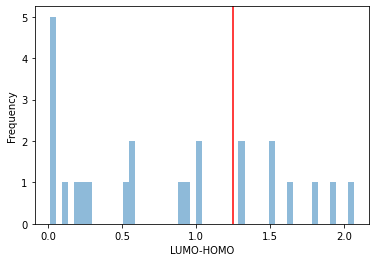

PXZ-TRZ


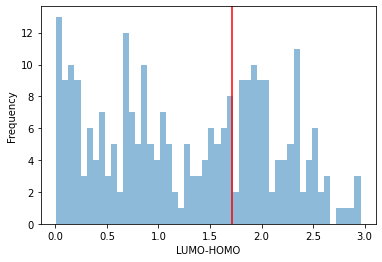

TXO-PhCz


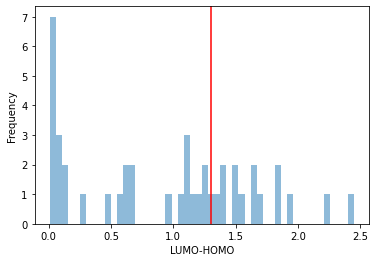

TXO-TPA


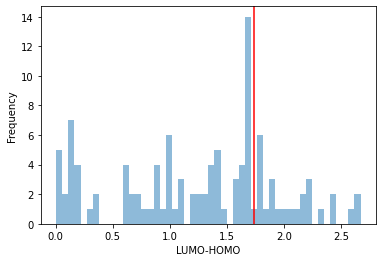

GOBVUP


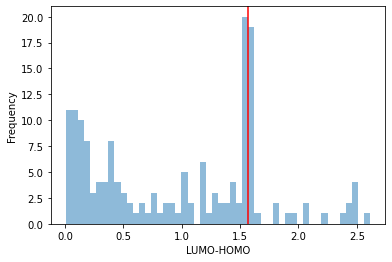

TUFWAS


In [47]:
# fig, axs = plt.subplots(2, len(smi_dict))
for i,family in enumerate(df_parent_data['Family']):
    if family != 'YAFNOI':
        #atom thresh
        thresh = df_parent_data['natoms'][i] - 10
        parent_LT = df_parent_data['LambdaT'][i] 

        df = df_5.query('Family == @family').query("N_atoms >= @thresh").query("shell_type == 'closed'")

#         bins = np.arange(0,4, 10)

        df['LUMO-HOMO'].plot.hist(alpha=0.5,bins=50)
        plt.axvline(x=df_parent_data['LUMO-HOMO'][i],color='r',label='Parent Molecule')
    #     plt.axvline(x=-20,label='SYBA -20',color='r',ls='--')
        plt.xlabel('LUMO-HOMO')
    #     plt.title(family)
    #     plt.legend()
    #     plt.savefig('Images/hist_SYBA_'+family+'_FILTERED.png', bbox_inches='tight',dpi=img_dpi)
        plt.show()
        print(family)

# What about fingerprint?

Relationship between HL/LT vs FP/SYBA

#### HL 

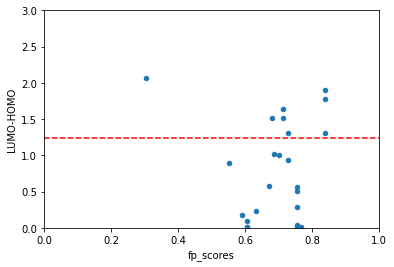

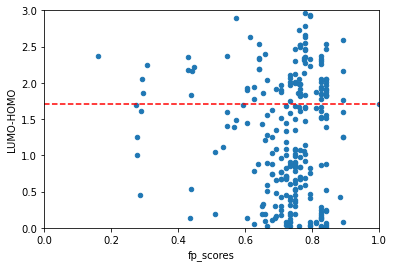

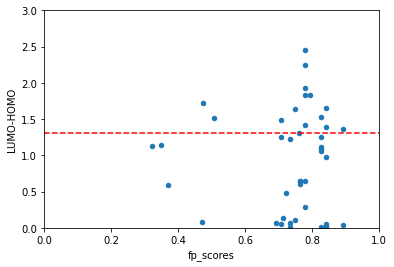

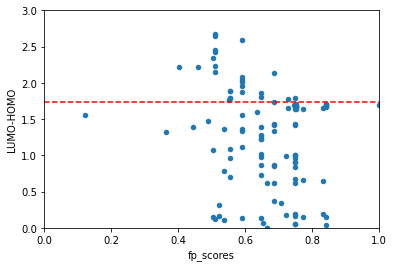

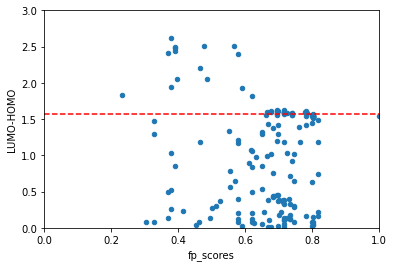

In [48]:
for i,family in enumerate(df_parent_data['Family']):
    if family != 'YAFNOI':
        #atom thresh
        thresh = df_parent_data['natoms'][i] - 10

        df = df_5.query('Family == @family').query("N_atoms >= @thresh").query("shell_type == 'closed'")
        df[['fp_scores','LUMO-HOMO']].sort_values("fp_scores").plot.scatter(x='fp_scores',y='LUMO-HOMO')
        plt.axhline(y=df_parent_data['LUMO-HOMO'][i],color='r',label='Parent molecule',ls='--')
        plt.ylim([0,3])
        plt.xlim([0,1])

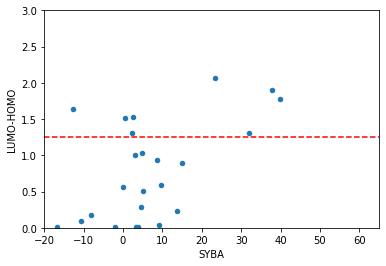

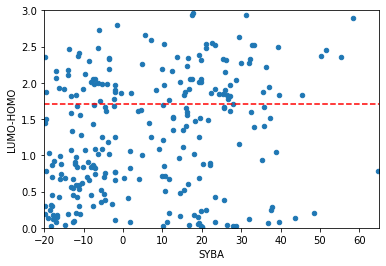

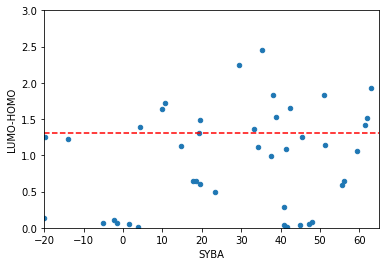

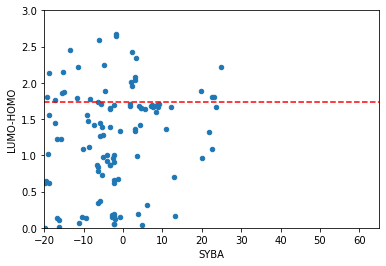

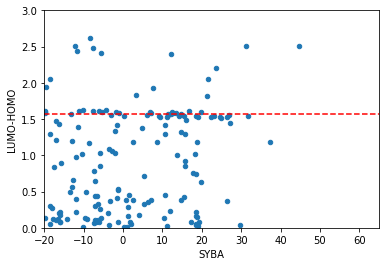

In [49]:
for i,family in enumerate(df_parent_data['Family']):
    if family != 'YAFNOI':
        #atom thresh
        thresh = df_parent_data['natoms'][i] - 10

        df = df_5.query('Family == @family').query("N_atoms >= @thresh").query("shell_type == 'closed'")
        df[['SYBA','LUMO-HOMO']].sort_values("SYBA").plot.scatter(x='SYBA',y='LUMO-HOMO')
        plt.axhline(y=df_parent_data['LUMO-HOMO'][i],color='r',label='Parent molecule',ls='--')
        plt.ylim([0,3])
        plt.xlim([-20,65])

#### LT

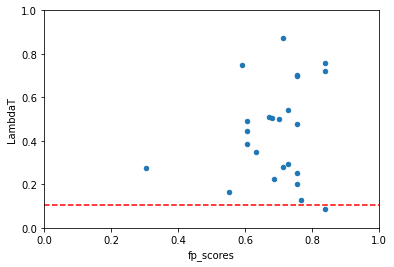

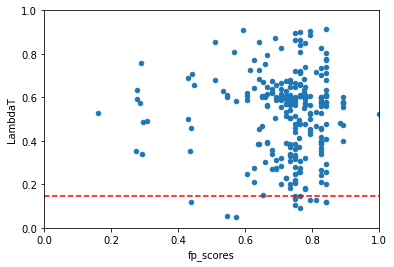

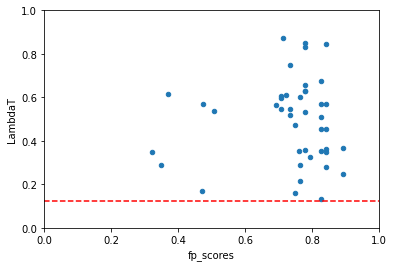

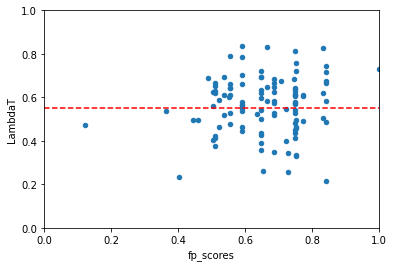

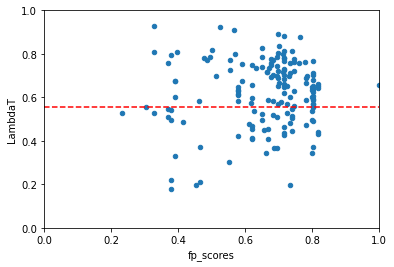

In [50]:
for i,family in enumerate(df_parent_data['Family']):
    if family != 'YAFNOI':
        #atom thresh
        thresh = df_parent_data['natoms'][i] - 10

        df = df_5.query('Family == @family').query("N_atoms >= @thresh").query("shell_type == 'closed'")
        df[['fp_scores','LambdaT']].sort_values("fp_scores").plot.scatter(x='fp_scores',y='LambdaT')
        plt.axhline(y=df_parent_data['LambdaT'][i],color='r',label='Parent molecule',ls='--')
        plt.ylim([0,1])
        plt.xlim([0,1])

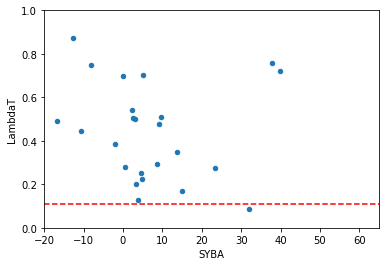

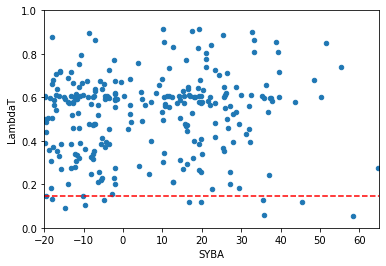

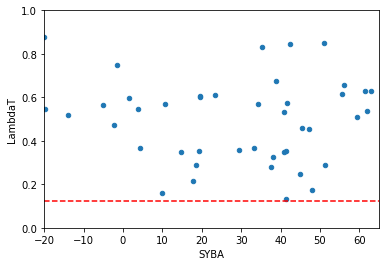

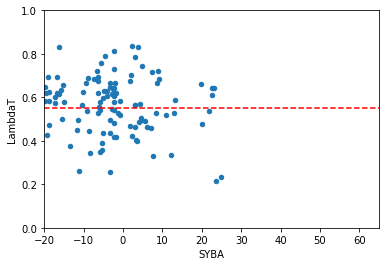

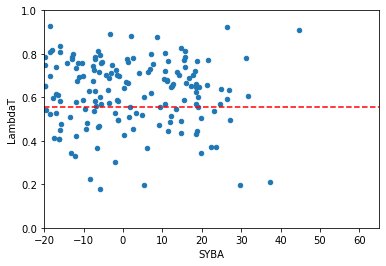

In [51]:
for i,family in enumerate(df_parent_data['Family']):
    if family != 'YAFNOI':
        #atom thresh
        thresh = df_parent_data['natoms'][i] - 10

        df = df_5.query('Family == @family').query("N_atoms >= @thresh").query("shell_type == 'closed'")
        df[['SYBA','LambdaT']].sort_values("SYBA").plot.scatter(x='SYBA',y='LambdaT')
        plt.axhline(y=df_parent_data['LambdaT'][i],color='r',label='Parent molecule',ls='--')
        plt.ylim([0,1])
        plt.xlim([-20,65])

In [52]:
df_parent_data

Family                                             SMILES Mol_names  \
0   PXZ-TRZ  c7ccc(c6nc(c1ccccc1)nc(c5ccc(n4c2ccccc2oc3cccc...   PXZ-TRZ   
1  TXO-PhCz  O=C6c1ccccc1S(=O)(=O)c7ccc(c2ccc4c(c2)c3ccccc3...  TXO-PhCz   
2   TXO-TPA  O=C5c1ccccc1S(=O)(=O)c6ccc(c4ccc(N(c2ccccc2)c3...   TXO-TPA   
3    GOBVUP        Clc4ccc(c3csc(=c2scc(c1ccc(Cl)cc1)s2)s3)cc4    GOBVUP   
4    TUFWAS  c6csc(c4sc(=c3sc(c1cccs1)c(c2cccs2)s3)sc4c5ccc...    TUFWAS   
5    YAFNOI            c1ccc3c(c1)c2ccccc2S36c4ccccc4c5ccccc56    YAFNOI   

   fp_scores  SYBA_score  natoms   LambdaT  N_atoms  \
0          1   36.220805      38  0.107584       60   
1          1   27.806475      36  0.148074       55   
2          1   49.425950      36  0.124097       57   
3          1   -2.196499      24  0.551026       34   
4          1   18.543954      30  0.557252       42   
5          1   18.541930      25  0.843576       41   

                                      log file      HOMO      LUMO  LUMO-HOMO  \
0   log-PXZ-TRZ_PBE_MMFF94_s0xyz_s0_cubic.yaml -4.317159 -3.070328   1.246831   
1  log-TXO-PhCz_PBE_MMFF94_s0xyz_s0_cubic.yaml -5.218214 -3.504901   1.713312   
2   log-TXO-TPA_PBE_MMFF94_s0xyz_s0_cubic.yaml -4.844501 -3.538314   1.306187   
3    log-GOBVUP_PBE_MMFF94_s0xyz_s0_cubic.yaml -3.955886 -2.220191   1.735695   
4    log-TUFWAS_PBE_MMFF94_s0xyz_s0_cubic.yaml -3.866078 -2.294039   1.572039   
5    log-YAFNOI_PBE_MMFF94_s0xyz_s0_cubic.yaml -2.800095 -2.726797   0.073298   

      Force  Total Energy per atom (eV/atom)  
0  0.059228                      -130.845350  
1  0.078844                      -143.889830  
2  0.052497                      -139.398779  
3  0.041024                      -190.182191  
4  0.067476                      -181.225573  
5  0.186780                      -121.536756

In [53]:
df_5.query('Mol_names == "PXZ-TRZ_866"')#.query("N_atoms >= 30").query("shell_type == 'closed'").query('SYBA >= -20')

Family    Mol_names  fp_scores  \
20  PXZ-TRZ  PXZ-TRZ_866   0.767442   

                                               SMILES  N_atoms shell_type  \
20  C1=[N+]C(c2nc(-c3ccccc3)nc(-c3ccccc3)n2)=CC=C1...       38       open   

         SYBA                                   FF_optimised_mol  \
20  11.468829  <rdkit.Chem.rdchem.Mol object at 0x000001D4D52...   

   FF_optimisation_msg  H_embed H_embed_msg   LambdaT  \
20                   0      0.0        pass  0.086748   

                                    log file      HOMO      LUMO  LUMO-HOMO  \
20  log-PXZ-TRZ_866_PBE_MMFF94_S0_cubic.yaml -4.456365 -3.226623   1.229742   

       Force  Total Energy per atom (eV/atom)   shell  
20  0.068179                      -134.596245  closed

In [58]:
pd.DataFrame(the_data).query('Mol_names == "PXZ-TRZ_866"')

Family    Mol_names  fp_scores  \
865  PXZ-TRZ  PXZ-TRZ_866   0.767442   

                                                SMILES  N_atoms shell_type  \
865  C1=[N+]C(c2nc(-c3ccccc3)nc(-c3ccccc3)n2)=CC=C1...       38       open   

          SYBA                                   FF_optimised_mol  \
865  11.468829  <rdkit.Chem.rdchem.Mol object at 0x000001D4D52...   

    FF_optimisation_msg  H_embed H_embed_msg  
865                   0      0.0        pass

In [1]:
img_dpi  = 300
df = pd.DataFrame(the_data)
for i,fam in enumerate(parent_data['molecule']):
    
    thresh = parent_data['n_atoms'][i] - 10
    parent_lambdaT = df_parent_data['LambdaT'][i]
    parent_HL = df_parent_data['LUMO-HOMO'][i]   
    
    
    N_unique_mols = df.query("Family == @fam").shape[0]
    N_atoms = df.query("Family == @fam").query("N_atoms >= @thresh").shape[0]
    N_closed = df.query("Family == @fam").query("N_atoms >= @thresh").query("shell_type == 'closed'").query("closed == 'closed'").shape[0]
    N_syba = df.query("Family == @fam").query("N_atoms >= @thresh").query("shell_type == 'closed'").query("closed == 'closed'").query('SYBA >= -20').shape[0]
    N_FFopt = df.query("Family == @fam").query("N_atoms >= @thresh").query("shell_type == 'closed'").query("closed == 'closed'").query('SYBA >= -20').query('FF_optimisation_msg == "0"').shape[0]
    
    df_DFT = df_5.query('Family == @fam').query("N_atoms >= @thresh").query("shell_type == 'closed'").query("closed == 'closed'").query('SYBA >= -20')
    
    N_SP_DFT = df_DFT.shape[0]
    N_HL_LT = df_DFT.query("LambdaT <= @parent_lambdaT").query("LUMO-HOMO <= @parent_HL").shape[0]
    
    N_mols = df_DFT.query("LambdaT <= @parent_lambdaT").query("LUMO-HOMO <= @parent_HL").shape[0]
    
    if N_mols < 10:
        n_needed_mols = 10 - N_mols
        N_additional = df_DFT.query("LUMO-HOMO <= @parent_HL").query("LambdaT > @parent_lambdaT").sort_values('LambdaT').head(n_needed_mols).shape[0]

    x = [0,-1,-2,-3,-4,-5,-6]
    y = [N_unique_mols,N_atoms, N_closed, N_syba,N_FFopt,N_SP_DFT,N_HL_LT+N_additional]
    y_ticks_labels = ['Unique','N atoms threshold','Closed Shell','SYBA $\geq$ -20','MMFF94','SP DFT','HL LT']
    
    
    
    plt.barh(x,y,color='cornflowerblue')
    plt.yticks(x,y_ticks_labels)
    plt.xlabel("Number of Molecules")
    plt.ylabel("Filter Stages")
#     plt.title(fam)
    print(fam)
    plt.savefig('Images/Funnel_Barh_'+fam+'_FILTERED.png', bbox_inches='tight',dpi=img_dpi)
    plt.show()
    if N_mols < 10:
        print(y_ticks_labels, '\n',y+[str(N_mols)+'+'+str(N_additional)])
    else:
        print(y_ticks_labels, '\n',y)